# 02 - Edge Detection

## Übersicht 
Es soll ein Überblick geschaffen werden wie die verschiedenen Edge Detection Algorithmen im Vergleich zu einander performen.

1. **Canny** - Multi-stage, thin edges
2. **Sobel** - Gradient-based, fast
3. **Scharr** - Improved Sobel, better rotation invariance
4. **Laplacian** - Second derivative, sehr noise-sensitiv
5. **Roberts Cross** - 2x2 kernel, fastest
6. **Prewitt** - Alternative zu Sobel


### Installation von packages & definierung vom Testbild

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

image_path = '../data/image-007.png'
image = cv2.imread(image_path)

### 1. Preprocessing
Für die Bildvearbeitung wird die im **01 - Image Preprocessing** definierte Methode verwendet.

In [2]:
def __clean(image):
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(grayscale, (5, 5), 0)
    
    _, threshold = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return threshold

### 2. Definierung der Algorithmen

In [3]:
blurred_image = __clean(image)

In [4]:
def canny(image):
    return cv2.Canny(image, 100, 200)

def sobel(image):
    gradient_x = cv2.Sobel(image, cv2.CV_16S, 1, 0)
    gradient_y = cv2.Sobel(image, cv2.CV_16S, 0, 1)

    gradient_x_abs = np.abs(gradient_x)
    gradient_y_abs = np.abs(gradient_y)

    return np.minimum(gradient_x_abs + gradient_y_abs, 255).astype(np.uint8)

def scharr(image):
    Gx = cv2.Scharr(image, cv2.CV_64F, 1, 0)
    Gy = cv2.Scharr(image, cv2.CV_64F, 0, 1)
    
    return cv2.magnitude(Gx, Gy)

def laplacian(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    return cv2.convertScaleAbs(laplacian)

def robert_cross(image):
    kernel_x = np.array([[1, 0],
                         [0, -1]])
    kernel_y = np.array([[0, 1],
                         [-1, 0]])
                         
    horizontal_edges = cv2.filter2D(image, -1, kernel_x)
    vertical_edges = cv2.filter2D(image, -1, kernel_y)
    
    horizontal_edges = np.float32(horizontal_edges)
    vertical_edges = np.float32(vertical_edges)

    gradient_magnitude = cv2.magnitude(horizontal_edges, vertical_edges)
    
    threshold = 50
    _, edges = cv2.threshold(gradient_magnitude, threshold, 255, cv2.THRESH_BINARY)
    
    return edges

def prewitt(image):
    kernel_x = np.array([[-1, 0, 1],
                         [-1, 0, 1],
                         [-1, 0, 1]])
    horizontal_edges = cv2.filter2D(image, -1, kernel_x)
    
    kernel_y = np.array([[-1, -1, -1],
                         [0, 0, 0],
                         [1, 1, 1]])
    
    vertical_edges = cv2.filter2D(image, -1, kernel_y)    
    horizontal_edges = np.float32(horizontal_edges)
    vertical_edges = np.float32(vertical_edges)

    gradient_magnitude = cv2.magnitude(horizontal_edges, vertical_edges)
    
    threshold = 50
    _, edges = cv2.threshold(gradient_magnitude, threshold, 255, cv2.THRESH_BINARY)
    
    return edges

### 3. Visualisierung der Resultate

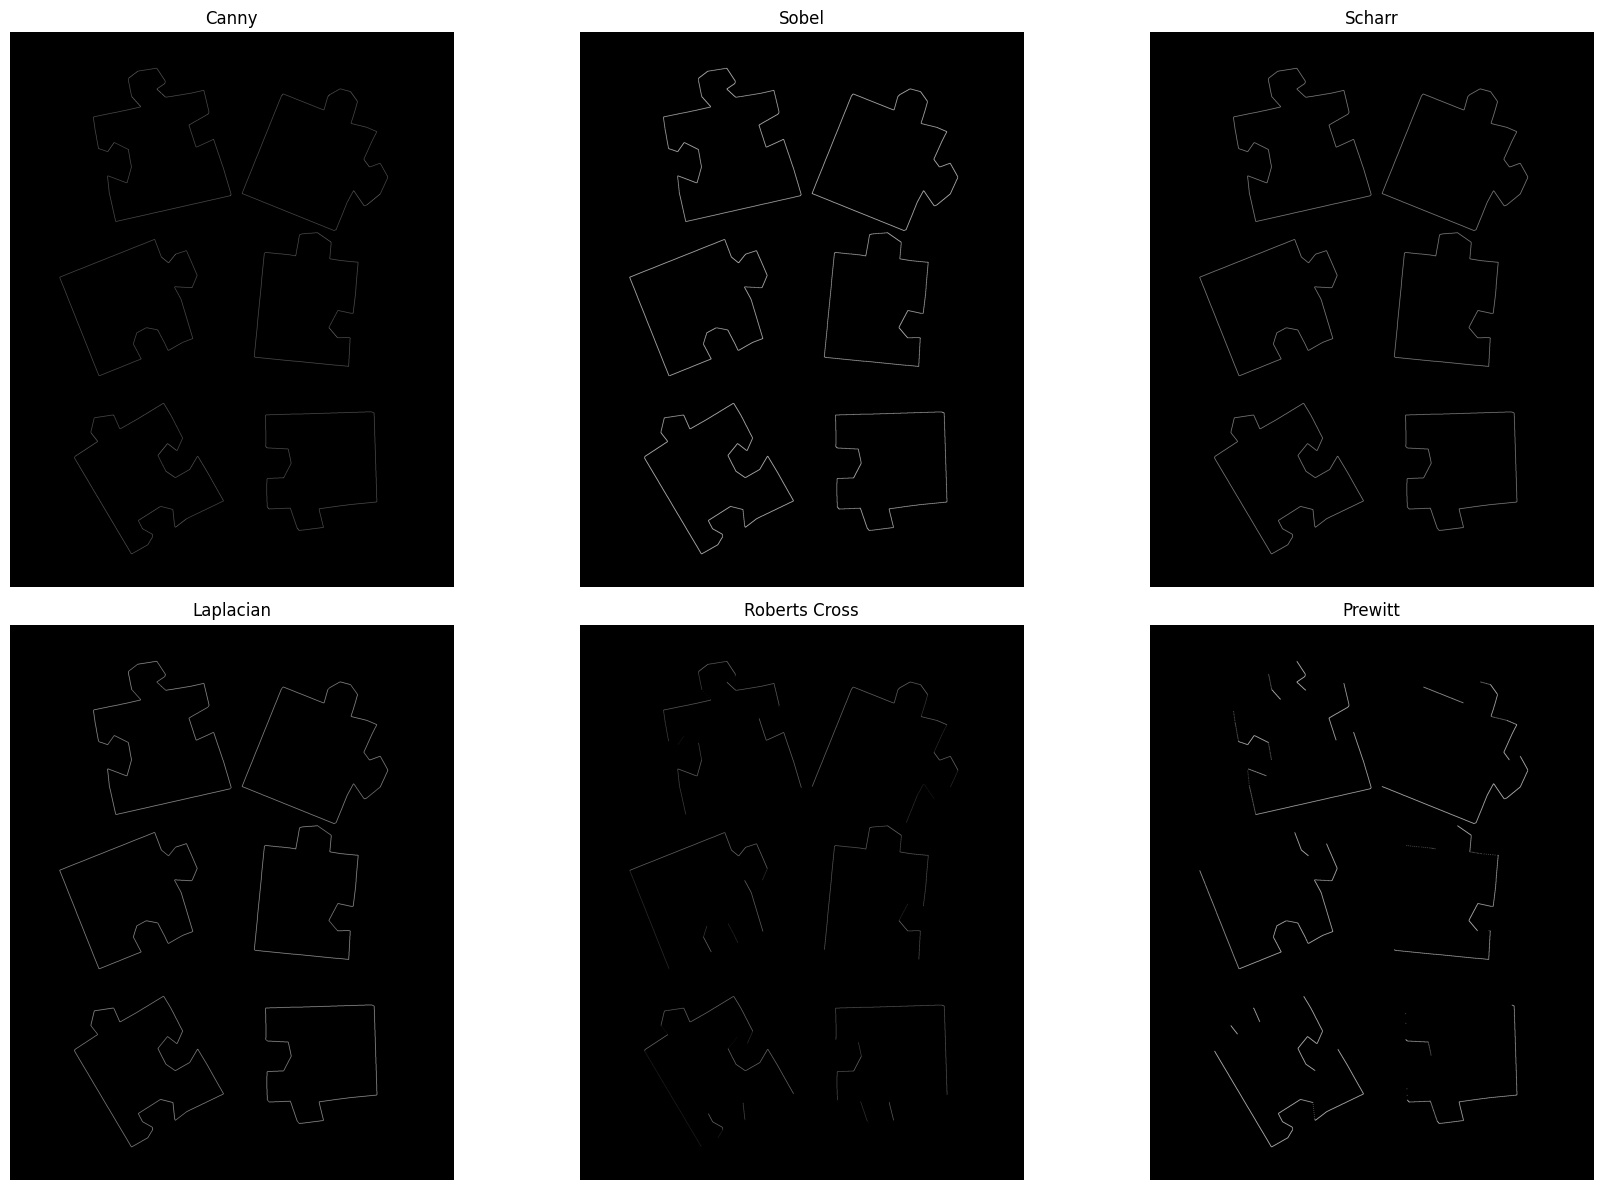

In [5]:
edges_canny = canny(blurred_image)
edges_sobel = sobel(blurred_image)
edges_scharr = scharr(blurred_image)
edges_laplacian = laplacian(blurred_image)
edges_roberts = robert_cross(blurred_image)
edges_prewitt = prewitt(blurred_image)

# Display comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes[0, 0].imshow(edges_canny, cmap='gray')
axes[0, 0].set_title('Canny', fontsize=12)
axes[0, 0].axis('off')

axes[0, 1].imshow(edges_sobel, cmap='gray')
axes[0, 1].set_title('Sobel', fontsize=12)
axes[0, 1].axis('off')

axes[0, 2].imshow(edges_scharr, cmap='gray')
axes[0, 2].set_title('Scharr', fontsize=12)
axes[0, 2].axis('off')

axes[1, 0].imshow(edges_laplacian, cmap='gray')
axes[1, 0].set_title('Laplacian', fontsize=12)
axes[1, 0].axis('off')

axes[1, 1].imshow(edges_roberts, cmap='gray')
axes[1, 1].set_title('Roberts Cross', fontsize=12)
axes[1, 1].axis('off')

axes[1, 2].imshow(edges_prewitt, cmap='gray')
axes[1, 2].set_title('Prewitt', fontsize=12)
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

### 4. Zwischenerkenntnis
Basierend aus dem Bilder sehen die Algorithmen Roberts Cross und Prewitt am wenigsten vielversprechend aus. Es sieht dementsprechend so aus als wurde man mit dem anderen weiterfahren.

### 5. Performance Vergleich
Um nicht nur die Qualität der Edges zu Vergleichen soll nun noch ein einfacher Performance Vergleich stattfinden, um nicht bei der Bearbeitungszeit zu scheitern.

In [ ]:
import time

methods = [
    ('Canny', lambda: canny(blurred_image)),
    ('Sobel', lambda: sobel(blurred_image)),
    ('Scharr', lambda: scharr(blurred_image)),
    ('Laplacian', lambda: laplacian(blurred_image)),
    ('Roberts', lambda: robert_cross(blurred_image)),
    ('Prewitt', lambda: prewitt(blurred_image))
]

print('Performance Test:\n')
print(f"{'Method':<15} {'Time (ms)':<12} {'Relative Speed'}")
print('-' * 50)

results = []
for name, func in methods:
    start = time.time()
    for _ in range(10):
        func()
    elapsed = (time.time() - start) / 10 * 1000
    results.append((name, elapsed))

fastest = min(r[1] for r in results)
for name, elapsed in results:
    relative = elapsed / fastest
    print(f"{name:<15} {elapsed:>8.2f} ms   {relative:.2f}x")

Performance Test (10 iterations each):

Method          Time (ms)    Relative Speed
--------------------------------------------------
Canny               1.15 ms   1.00x
Sobel               5.42 ms   4.70x
Scharr             12.11 ms   10.49x
Laplacian           6.44 ms   5.58x
Roberts             6.81 ms   5.90x
Prewitt             9.86 ms   8.54x


### Zusammenfassung
Basierend aus der Visualisierung erscheint die Algorithmen Sobal, Scharr und Laplacian am geeignetesten. Beim Performance Vergleich allerdings sieht man dass der Scharr im Vergleich zu den anderen zwei deutchlich langsamer ist, deshalb sind Laplacian und Sobel die Favoriten zur Umsetzung des Puzzle Solvers.

Aufgrund der Dichte der Kanten wird der Sobel bevorzugt, da es hoffentlich geeigneter für die Contour Detection ist.